In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

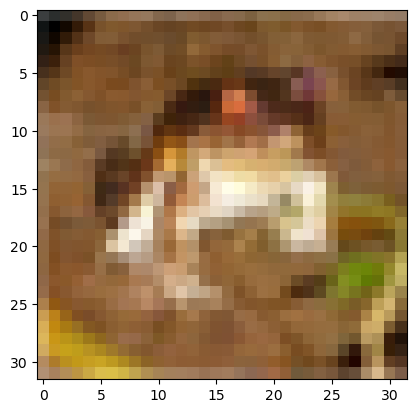

In [10]:
plt.imshow(X_train[0])

In [12]:
X_train = X_train/255
X_test = X_test/255

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_cat_train = to_categorical(y_train, 10)

In [18]:
y_cat_test = to_categorical(y_test, 10)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from time import time

In [20]:
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [21]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [23]:
model.fit(X_train, y_cat_train, epochs=20, callbacks=[tensorboard, early_stop], validation_data=(X_test, y_cat_test))

Epoch 1/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5213 - accuracy: 0.4514 - val_loss: 1.2937 - val_accuracy: 0.5415
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1843 - accuracy: 0.5822 - val_loss: 1.1979 - val_accuracy: 0.5632
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0359 - accuracy: 0.6356 - val_loss: 1.0813 - val_accuracy: 0.6221
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9359 - accuracy: 0.6734 - val_loss: 0.9932 - val_accuracy: 0.6526
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8481 - accuracy: 0.7036 - val_loss: 0.9762 - val_accuracy: 0.6671
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7788 - accuracy: 0.7271 - val_loss: 0.9873 - val_accuracy: 0.6689


In [26]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

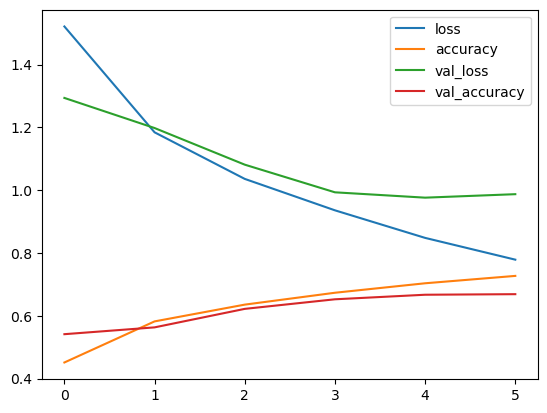

In [27]:
metrics.plot()

In [48]:
model.evaluate(X_test, y_cat_test, verbose=0)

[0.9872750043869019, 0.6689000129699707]

In [50]:
predict = np.argmax(model.predict(X_test), axis=1)

313/313 [==============================] - 1s 2ms/step


In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.64      0.75      0.69      1000
           1       0.75      0.85      0.80      1000
           2       0.54      0.61      0.57      1000
           3       0.48      0.52      0.50      1000
           4       0.59      0.65      0.62      1000
           5       0.63      0.48      0.55      1000
           6       0.81      0.69      0.74      1000
           7       0.74      0.71      0.73      1000
           8       0.75      0.77      0.76      1000
           9       0.82      0.66      0.73      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



<Axes: >

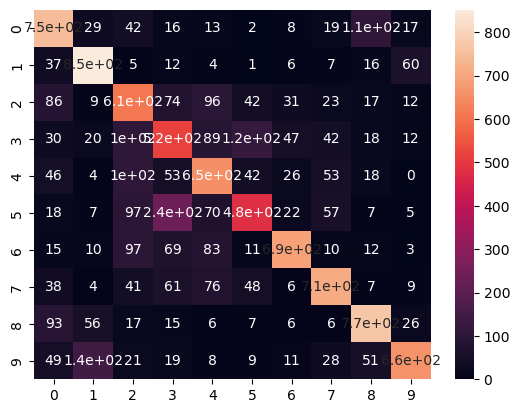

In [53]:
confusion_matrix(y_test, predict)
sns.heatmap(confusion_matrix(y_test, predict), annot=True)

Actual Value:  [1]
Predictd value:  1


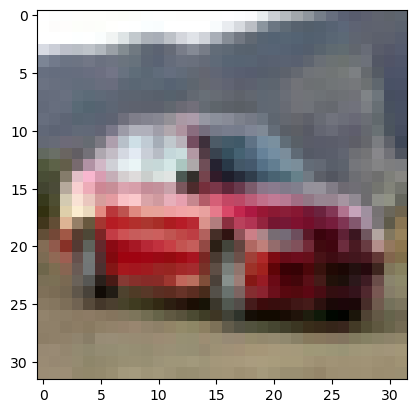

In [67]:
import random
random_value = random.randint(0,len(X_test))
print('Actual Value: ',y_test[random_value])
plt.imshow(X_test[random_value])
print('Predictd value: ',predict[random_value])